<a href="https://colab.research.google.com/github/Anup-K29/Heart-Disease-Prediction-System/blob/main/Heart_Disease_Prediction_Using__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


Importing and Exploring the dataset

In [ ]:
data=pd.read_csv("/content/data.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1025, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
 #Split dataset into two categories

categorical_variables= data[['sex',"cp","fbs","restecg","exang","target"]]
new_var = data[["age","trestbps","chol","thalach","oldpeak","slope","ca","thal"]]



In [ ]:
type(categorical_variables)

pandas.core.frame.DataFrame

In [ ]:
type(continuous_variable)

pandas.core.frame.DataFrame

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
categorical_variables.describe()

,sex,cp,fbs,restecg,exang,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.695610,0.942439,0.149268,0.529756,0.336585,0.513171
std,0.460373,1.029641,0.356527,0.527878,0.472772,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000


In [ ]:
continuous_variable.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,1.385366,0.754146,2.323902
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.617755,1.030798,0.620660
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
data.groupby("target").count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,499,499,499,499,499,499,499,499,499,499,499,499,499
1,526,526,526,526,526,526,526,526,526,526,526,526,526


In [ ]:
#defining the frames
age = data[["age"]]
chol = data[["chol"]]

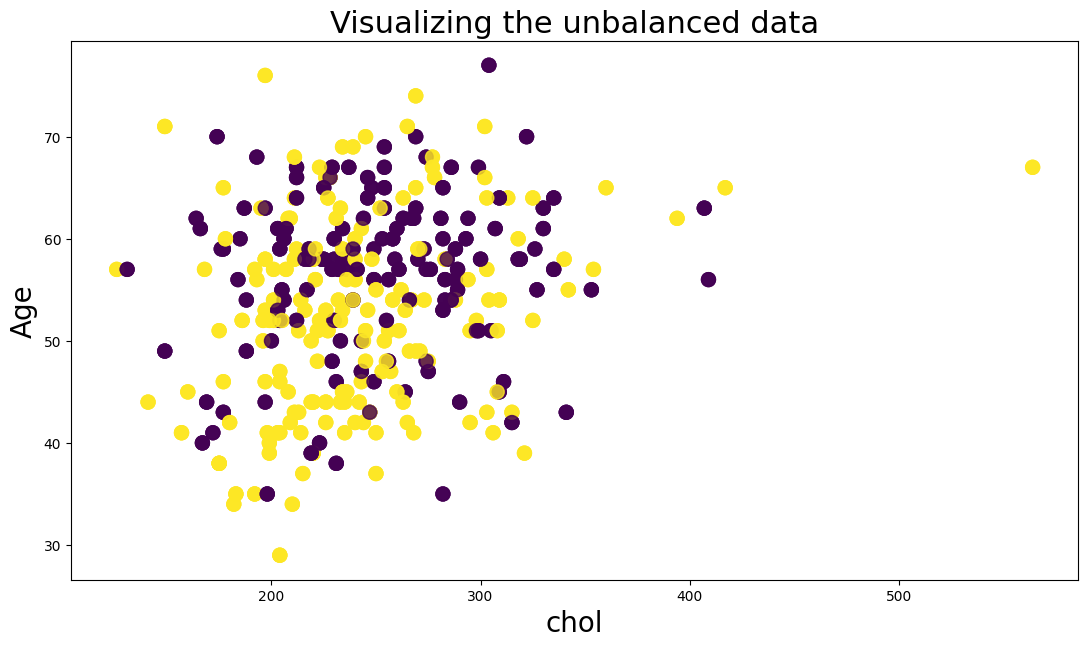

In [ ]:
# Visualizing the unbalanced data with a scatter plot, the colors will depend on
# DEATH_EVENT (0 or 1)

plt.figure(figsize=(13,7))
plt.scatter(chol, age, c = data["target"], s=100, alpha=0.8)
plt.xlabel("chol", fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize=22)
plt.show()

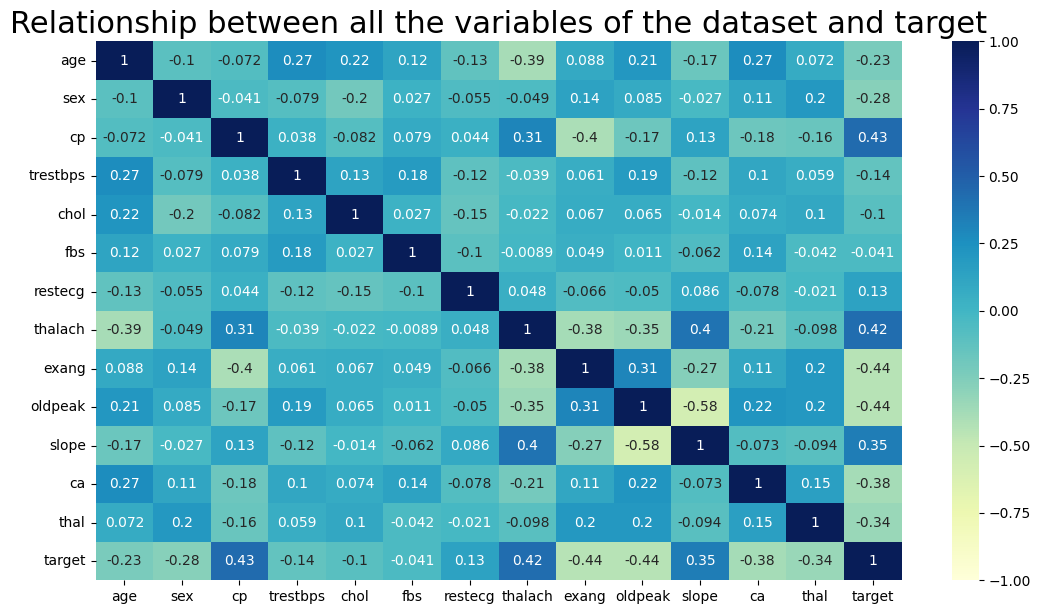

In [ ]:
#Relationship between all the variables of the dataset and target

plt.figure(figsize=(13,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and target", fontsize = 22)
plt.show()

<ipython-input-72-7981800a3677>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=data,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

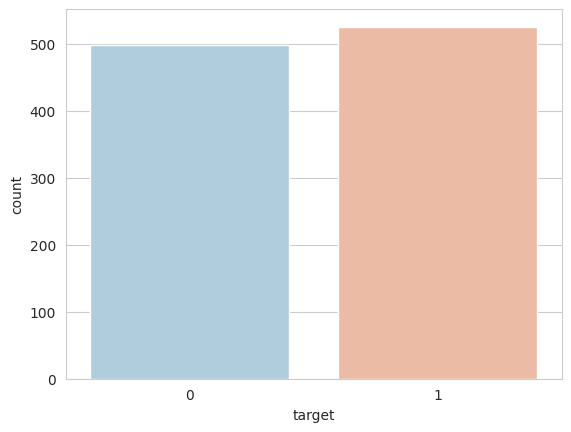

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

Data Visualization

In [ ]:

categorical_variables= data[['sex',"cp","fbs","restecg","exang","target"]]
continuous_variable = data[["age","trestbps","chol","thalach","oldpeak","slope","ca","thal"]]

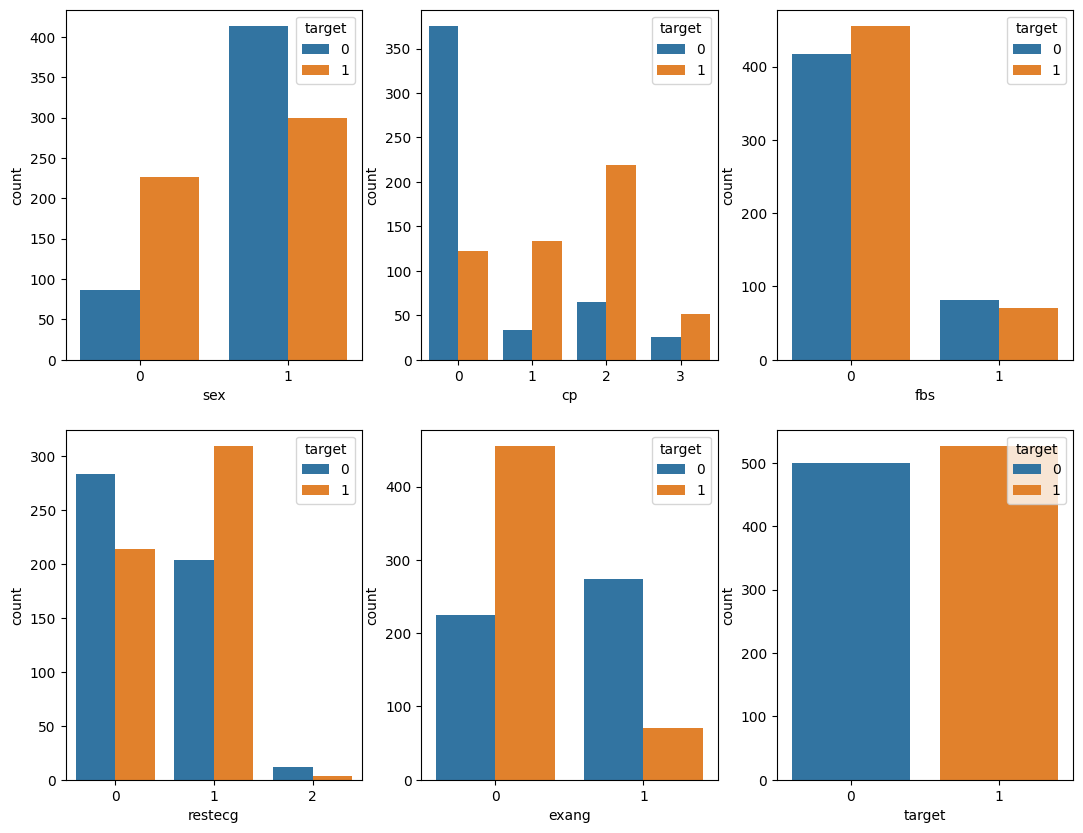

In [ ]:
# Plotting the impact of categorical variables on DEATH_EVENT
plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_variables):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "target")
plt.show()

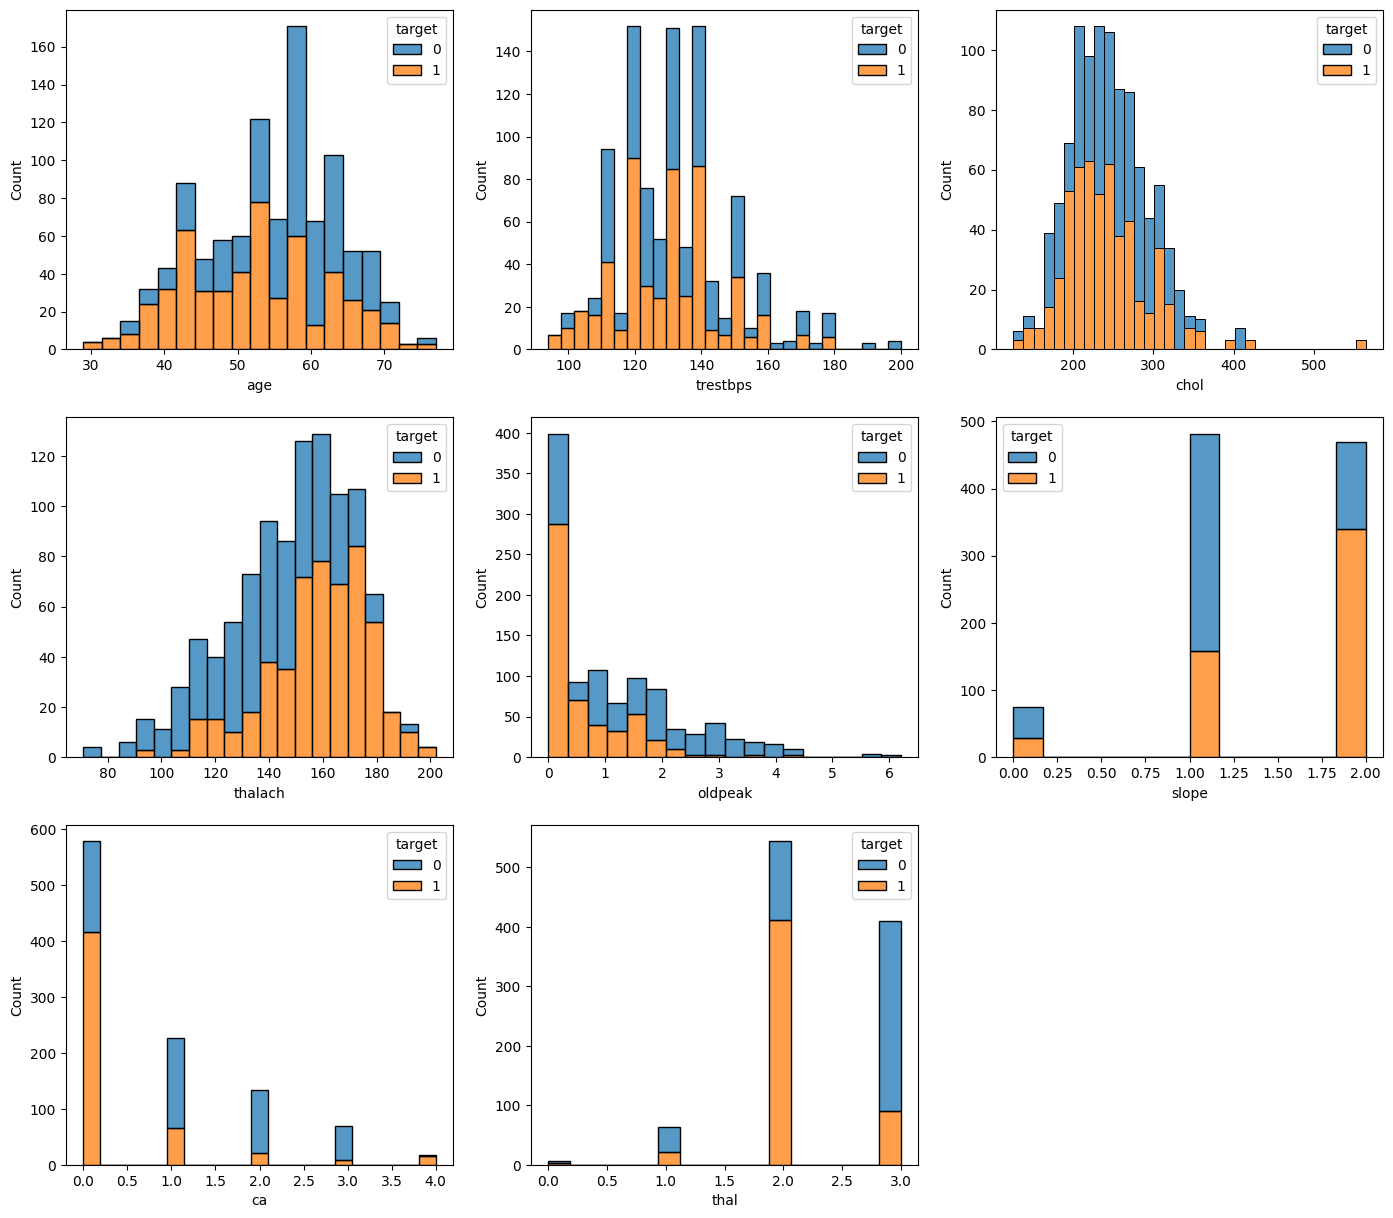

In [ ]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_variable):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "target", multiple="stack")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

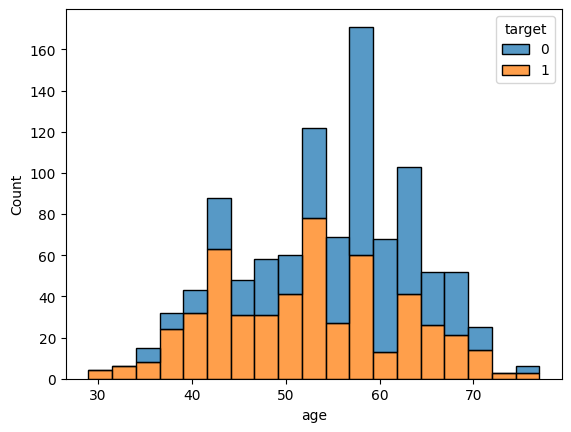

In [ ]:

sns.histplot(data = data, x= 'age', hue = "target", multiple="stack")

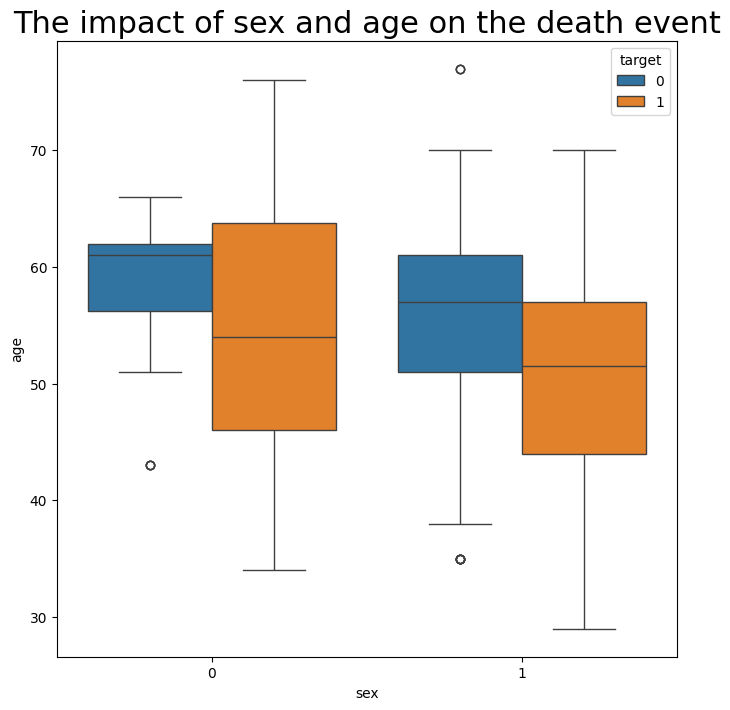

In [ ]:
#impact of sex and age on the target"
plt.figure(figsize=(8,8))
sns.boxplot(data=data, x="sex", y="age", hue="target")
plt.title("The impact of sex and age on the death event", fontsize=22)
plt.show()

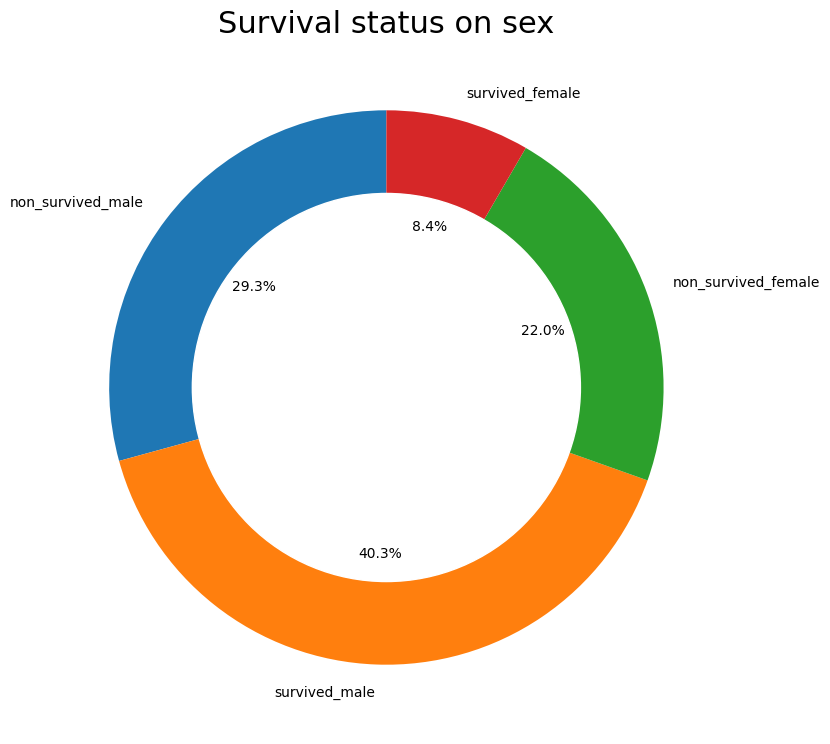

In [ ]:
# Analyzing the survival status on sex

male = data[data["sex"]==1]
female = data[data["sex"]==0]

non_survived_male = male[male["target"]==1]
survived_male = male[male["target"]==0]
non_survived_female = female[female["target"]==1]
survived_female = female[female["target"]==0]

sex_data = [len(non_survived_male), len(survived_male), len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels = sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize=22)
plt.show()

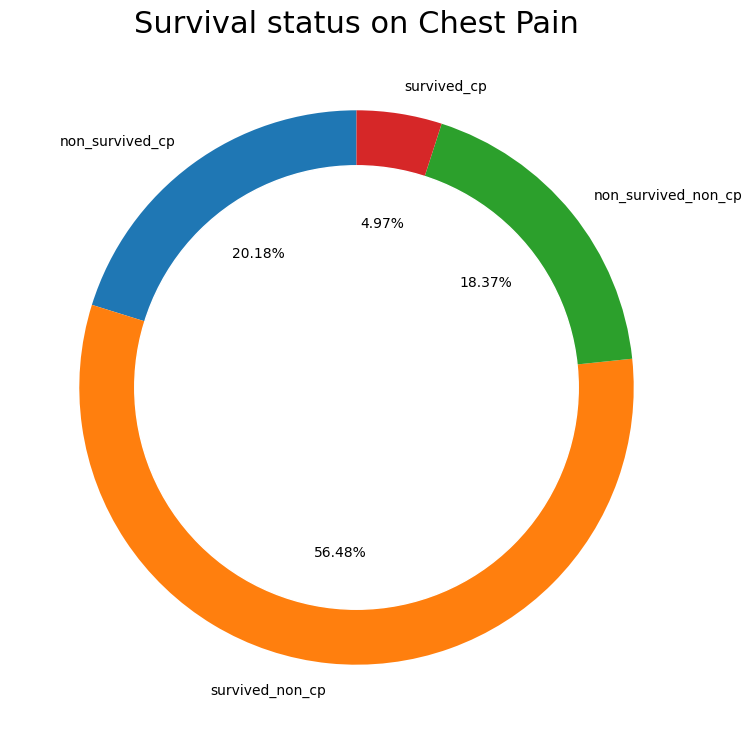

In [ ]:

# Analyzing the survival status on chest pain

cp = data[data["cp"]==1]
non_cp = data[data["cp"]==0]

non_survived_cp = cp[cp["target"]==1]
survived_non_cp = non_cp[non_cp["target"]==0]
non_survived_non_cp = non_cp[non_cp["target"]==1]
survived_cp = cp[cp["target"]==0]

cp_data = [len(non_survived_cp), len(survived_non_cp),len(non_survived_non_cp),len(survived_cp)]
cp_labels = ["non_survived_cp", "survived_non_cp", "non_survived_non_cp", "survived_cp"]

plt.figure(figsize=(9,9))
plt.pie(cp_data, labels = cp_labels, autopct='%.2f%%', startangle=90)
circle = plt.Circle((0,0), 0.8, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on Chest Pain", fontsize=22)
plt.show()

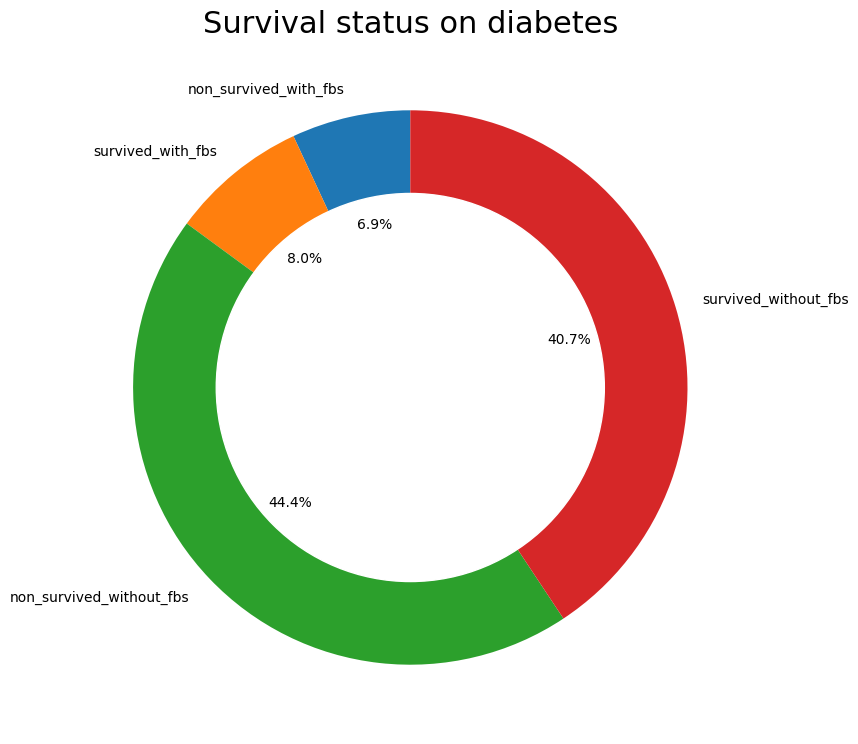

In [ ]:
# Analyzing the survival status on diabetes

with_fbs = data[data["fbs"]==1]
without_fbs = data[data["fbs"]==0]

non_survived_with_fbs = with_fbs[with_fbs["target"]==1]
survived_with_fbs = with_fbs[with_fbs["target"]==0]
non_survived_without_fbs = without_fbs[without_fbs["target"]==1]
survived_without_fbs = without_fbs[without_fbs["target"]==0]

fbs_data = [len(non_survived_with_fbs), len(survived_with_fbs), len(non_survived_without_fbs), \
                 len(survived_without_fbs)]
fbs_labels = ["non_survived_with_fbs","survived_with_fbs","non_survived_without_fbs",\
                   "survived_without_fbs"]

plt.figure(figsize=(9,9))
plt.pie(fbs_data, labels = fbs_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize=22)
plt.show()

Data modeling and prediction using contiuous data

In [ ]:
x=data[["age","trestbps","chol","thalach","oldpeak","slope","ca","thal"]]
y=data["target"]


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=2)

In [ ]:
# Data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
accuracy_list=[]

Logistic Regression

In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction = lr_model.predict(x_test_scaled)
lr_accuracy = (round(accuracy_score(lr_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(lr_accuracy)

Support Vector Machine

In [ ]:
#Support vector machine
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction = svc_model.predict(x_test_scaled)
svc_accuracy = (round(accuracy_score(svc_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(svc_accuracy)

Decision Tree Classifier

In [ ]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction = dt_model.predict(x_test_scaled)
dt_accuracy = (round(accuracy_score(dt_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(dt_accuracy)

Naive Bayes

In [ ]:
#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction = nb_model.predict(x_test_scaled)
nb_accuracy = (round(accuracy_score(nb_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(nb_accuracy)

Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction = rf_model.predict(x_test_scaled)
rf_accuracy = (round(accuracy_score(rf_prediction, y_test), 4) * 100) #percentage
accuracy_list.append(rf_accuracy)

In [ ]:
print(accuracy_list)

[78.9, 88.31, 74.68, 79.55, 96.75]


In [ ]:
models=["Random Forest Classifier","Naive Bayes","Decision Tree Classifier","Support Vector Machine","Logistic Regression"]

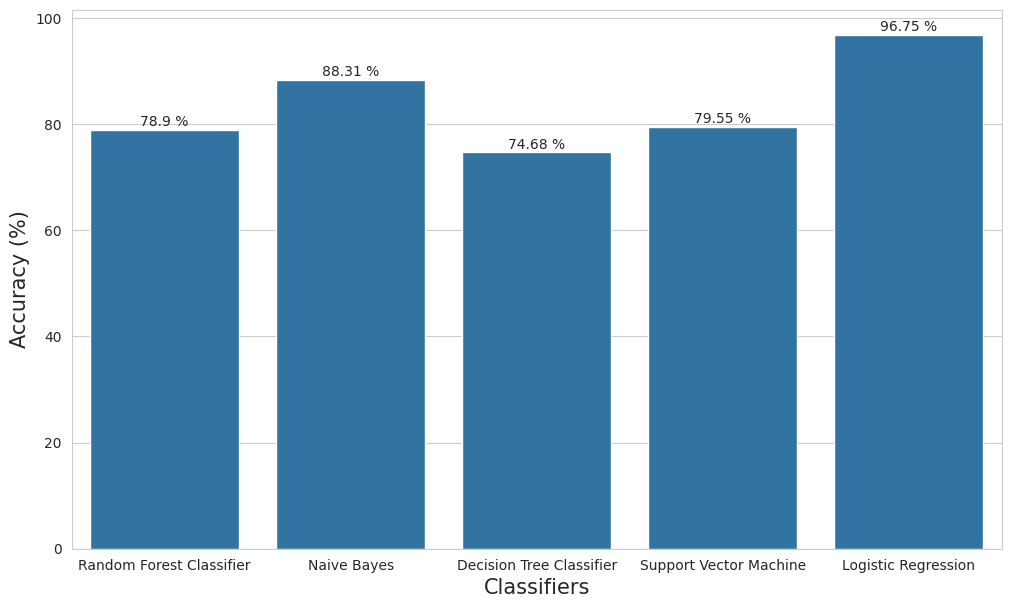

In [ ]:

plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()